Download the Dataset

Import the recquired library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
import keras
from keras.models import Sequential
from tensorflow.keras import layers
import nltk
import string 
import seaborn as sns
import matplotlib.pyplot as plt

Read dataset and do pre-processing

In [ ]:
dv=pd.read_csv('spam.csv',encoding='ISO-8859-1')
dv

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dv.shape

(5572, 5)

In [ ]:
#renaming cols
dv.rename(columns={'v1':'target','v2':'text'},inplace=True)
dv.sample(5)

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
108,ham,I know! Grumpy old people. My mom was like you...,NaN,NaN,NaN
34,spam,Thanks for your subscription to Ringtone UK yo...,NaN,NaN,NaN
844,ham,K.k:)when are you going?,NaN,NaN,NaN
824,ham,Have a good evening! Ttyl,NaN,NaN,NaN
187,spam,Please call our customer service representativ...,NaN,NaN,NaN


In [ ]:
dv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   target      5572 non-null   object
 1   text        5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
dv.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
dv.sample(5)

,target,text
5502,ham,Apo all other are mokka players only
1281,ham,Am I the only one who doesn't stalk profiles?
5214,spam,Natalja (25/F) is inviting you to be her frien...
1321,ham,"I wake up long ago already... Dunno, what othe..."
2188,spam,FREE camera phones with linerental from 4.49/m...


In [ ]:
dv['target'] = encoder.fit_transform(dv['target'])
dv.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
dv.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#checking for duplicate values
dv.duplicated().sum()

403

In [ ]:
#remove duplicates
dv=dv.drop_duplicates(keep='first')

In [ ]:
dv.duplicated().sum()

0

Text preprocessing

In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('living')

'live'

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)


  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)  

  text = y[:]
  y.clear()
  
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
transform_text('WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.')

'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour'

In [ ]:
dv['text'][8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [ ]:
dv['transformed_text']=dv['text'].apply(transform_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dv.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
spam_wc = wc.generate(dv[dv['target']==1]['transformed_text'].str.cat(sep=" "))

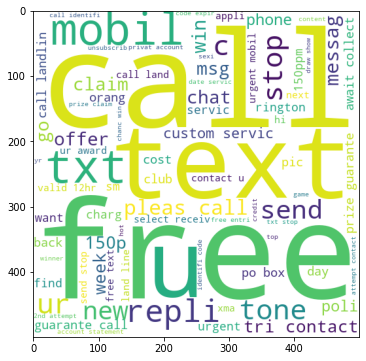

In [ ]:
plt.figure(figsize=(24,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(dv[dv['target']==0]['transformed_text'].str.cat(sep=" "))

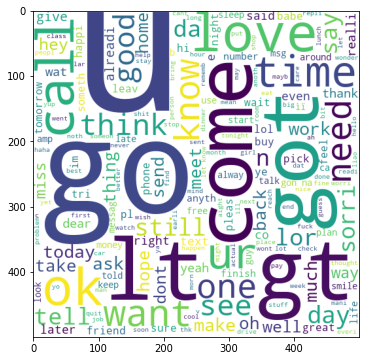

In [ ]:
plt.figure(figsize=(24,6))
plt.imshow(ham_wc)

In [ ]:
dv.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in dv[dv['target']==1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [ ]:
len(spam_corpus)

9939

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


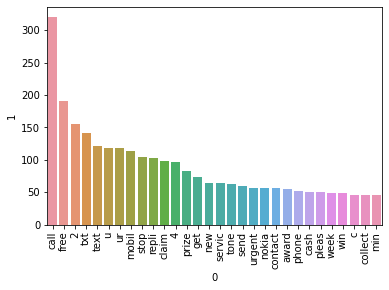

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in dv[dv['target']==0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [ ]:
len(ham_corpus)

35394

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


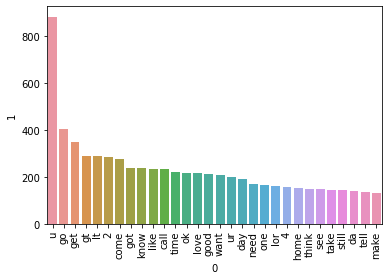

In [ ]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
dv.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


Create model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
x = cv.fit_transform(dv['transformed_text']).toarray()

In [ ]:
x.shape

(5169, 6708)

In [ ]:
y = dv['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model = keras.Sequential()

Add Layers (LSTM, Dense-(Hidden Layers), Output)

In [ ]:
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 embedding_1 (Embedding)     (None, 10, 64)            64000     
                                                                 
 gru (GRU)                   (None, 10, 256)           247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 10)                1

Compile the Model

In [ ]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

Fit the Model

In [ ]:
model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs=5)

Epoch 1/5


130/130 [==============================] - 353s 3s/step - loss: 0.5022 - accuracy: 0.8699 - val_loss: 0.4193 - val_accuracy: 0.8665
Epoch 2/5
130/130 [==============================] - 323s 2s/step - loss: 0.3881 - accuracy: 0.8755 - val_loss: 0.3998 - val_accuracy: 0.8665
Epoch 3/5
130/130 [==============================] - 318s 2s/step - loss: 0.3841 - accuracy: 0.8755 - val_loss: 0.4019 - val_accuracy: 0.8665
Epoch 4/5
130/130 [==============================] - 319s 2s/step - loss: 0.3834 - accuracy: 0.8755 - val_loss: 0.4071 - val_accuracy: 0.8665
Epoch 5/5
130/130 [==============================] - 319s 2s/step - loss: 0.3811 - accuracy: 0.8755 - val_loss: 0.4045 - val_accuracy: 0.8665


Save the Model

In [ ]:
model.save('spam.h5')

Test the Model

In [ ]:
ypred = model.predict(x_test)
ypred

33/33 [==============================] - 65s 2s/step


array([[ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404],
       [ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404],
       [ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404],
       ...,
       [ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404],
       [ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404],
       [ 6.4079766,  4.907742 , -1.2559439, ..., -1.6597061, -1.5828496,
        -1.0979404]], dtype=float32)

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
text = model.predict(cv.transform(["Wish you many more happy returns of the day!"]).toarray())

1/1 [==============================] - 0s 216ms/step


In [ ]:
class_name = ["spam_corpus","ham_corpus"]
pred_id = text.argmax(axis=1)[0]
pred_id
print(str(class_name[pred_id]))

spam_corpus
